In [1]:
import ast
import json
import re
import matplotlib.pyplot as plt

In [2]:
def load_jsonl(path: str):
    with open(path) as f:
        return [json.loads(line) for line in f.readlines() if line]

In [3]:
train = load_jsonl("train.jsonl")

In [4]:
answer_calc = [
    re.findall(r"<<([^<>]+=[^<>]+)>>", e["answer"]) + re.findall(r"\#\#\#\#\s*(\S+)\s*", e["answer"]) 
    for e in train ]

In [5]:
answer_calc_ord = sorted(zip(answer_calc, train), key=lambda e: len(e[0]))
answer_calc, train = [t[0] for t in answer_calc_ord], [t[1] for t in answer_calc_ord]
# discard all examples with no extractable calculator annotations
first_explicit = [len(e) for e in answer_calc].index(2)
answer_calc, train = answer_calc[first_explicit:], train[first_explicit:]

In [12]:
i = 1
print(f"Q: {train[i]['question']}\n\nA: {train[i]['answer']}\n\n{answer_calc[i]}")

Q: A car is driving through a tunnel with many turns. After a while, the car must travel through a ring that requires a total of 4 right-hand turns. After the 1st turn, it travels 5 meters. After the 2nd turn, it travels 8 meters. After the 3rd turn, it travels a little further and at the 4th turn, it immediately exits the tunnel. If the car has driven a total of 23 meters around the ring, how far did it have to travel after the 3rd turn?

A: From the details given, the car has traveled 5 meters at the 1st turn + 8 meters after the 2nd turn + 0 meters after the 4th turn = <<5+8+0=13>>13 meters around the ring.
It must therefore have driven 23 total meters – 13 calculated meters = 10 meters after the 3rd turn.
#### 10

['5+8+0=13', '10']


In [22]:
answer_calc[1000]

['1.5*3=4.5', '1.5+4.5=6', '6']

In [115]:
answer_calc_all = [e for c in answer_calc for e in c]
answer_calc_all_ord = sorted(answer_calc_all, key=lambda e: len(re.findall(r"\d+(?:\.\d+)?", e)))

In [116]:
answer_calc_ast = [ast.parse(c.replace(",", "").split("=")[0]) for c in answer_calc_all_ord]

In [122]:
print(answer_calc_all_ord[-3].replace(",", "").split("=")[0])
print(ast.dump(answer_calc_ast[-3], indent=4))

1/2*30+1/2*40+1/2*50
Module(
    body=[
        Expr(
            value=BinOp(
                left=BinOp(
                    left=BinOp(
                        left=BinOp(
                            left=Constant(value=1),
                            op=Div(),
                            right=Constant(value=2)),
                        op=Mult(),
                        right=Constant(value=30)),
                    op=Add(),
                    right=BinOp(
                        left=BinOp(
                            left=Constant(value=1),
                            op=Div(),
                            right=Constant(value=2)),
                        op=Mult(),
                        right=Constant(value=40))),
                op=Add(),
                right=BinOp(
                    left=BinOp(
                        left=Constant(value=1),
                        op=Div(),
                        right=Constant(value=2)),
                    op=Mult(),
               

In [128]:
answer_calc_ast[-3].body[0].value

In [101]:
answer_calc_all_ord[-10:]

['10+14+18+22+26+30=120',
 '40+50+65+36+82+72+26=371',
 '7+12+14+12+5+18+12=80',
 '40+200+300+130+40+80+444=1234',
 '.25+.5+.75+1+1.25+1.5+1.75=7',
 '1+3+5+7+9+11+13=49',
 '2+2+2+1/3+1/3+1/3=7',
 '1/2*30+1/2*40+1/2*50=60',
 '1+3+2+4+3+5+6+1+4+2=31',
 '2*100+1*50+5*20+3*10+7*5+27*1=442']

In [90]:
n_operands = [len(re.findall(r"\d+", c)) for c in answer_calc_all if "=" in c]

In [87]:
operations = [o for c in answer_calc_all for o in re.findall(r"([^\d=.,()]+)[+-]?", c)]

In [129]:
set(o for o in operations if len(o) == 1 or o[-1] not in ["-", "+"])

{'*', '+', '-', '/', '//'}

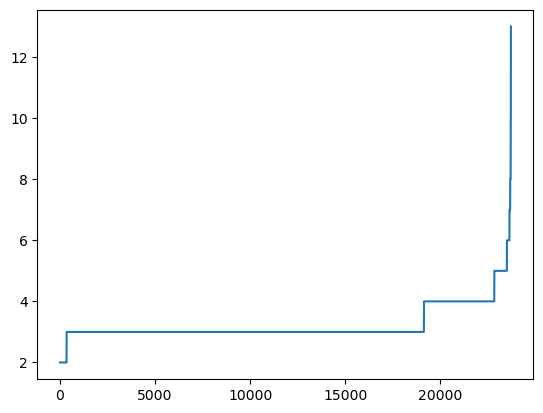

In [91]:
plt.plot(list(range(len(n_operands))), sorted(n_operands))